In [ ]:
import pandas as pd 
import numpy as np
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Table of Contents</h1>
<a class="list-group-item list-group-item-action" data-toggle="list" href = "#1" role="tab" aria-controls="settings">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
<a class="list-group-item list-group-item-action" data-toggle="list" href = "#2" role="tab" aria-controls="settings">2. Load a Clean Dataset<span class="badge badge-primary badge-pill">2</span></a>
<a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings">3. Basic Text Pre-Processing<span class="badge badge-primary badge-pill">3</span></a>
   <a class="list-group-item list-group-item-action"  data-toggle="list" href="#4" role="tab" aria-controls="settings">4. One-Hot Encoding<span class="badge badge-primary badge-pill">4</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#5" role="tab" aria-controls="settings">5. Bag of Words<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#6" role="tab" aria-controls="settings">6. Bag of N grams<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#7" role="tab" aria-controls="settings">7. TF-IDF<span class="badge badge-primary badge-pill">7</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#8" role="tab" aria-controls="settings">8. Word2vec Word Embeddings<span class="badge badge-primary badge-pill">8</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#9" role="tab" aria-controls="settings">9. Glove Word Embeddings<span class="badge badge-primary badge-pill">9</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#10" role="tab" aria-controls="settings">10. FastText Word Embeddings<span class="badge badge-primary badge-pill">10</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#11" role="tab" aria-controls="settings">11.   Visualizing Embeddings<span class="badge badge-primary badge-pill">11</span></a>
  


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Introduction</h1><a id = "1" ></a>


In Natural Language Processing (NLP) the conversion of raw-text to numerical form is called <b>Text Representation</b> and believe me this step is one of the most important steps in the NLP pipeline as if we feed in poor features in ML Model, we will get poor results. In computer science, this is often called “garbage in, garbage out.”

<b>I observed in NLP feeding a good text representation to an ordinary algorithm will get you much farther compared to applying a topnotch algorithm to an ordinary text representation.</b>

In this notebook, I will discuss various text-representation schemes with their advantages and disadvantages so that you can choose one of the schemes which suit your task most. Our main objective is to transform a given text into numerical form so that it can be fed
into NLP and ML algorithms.

![](https://www.oreilly.com/library/view/practical-natural-language/9781492054047/assets/pnlp_0301.png)

In this notebook, the focus will be on the dotted box in the figure 


here write a para on the flow of the notebook later


But before moving on to the Text representation step first we have to get a cleaned dataset which then has to be preprocessed. In this notebook, I will be using only a few basic steps to preprocess the text data

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Load a Clean Dataset</h1><a id = "2" ></a>

Kaggle Datasets is one of the best sources to get a clean dataset for this notebook I will be using [Twitter US Airline Sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) dataset.


In [ ]:
clean_data = pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')

In [ ]:
clean_data.head()

In [ ]:
clean_data.info()

In [ ]:
sns.countplot(x = "airline_sentiment", data = clean_data)

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Basic Text Pre-Processing</h1><a id = "3" ></a>

Text preprocessing steps include a few essential tasks to further clean the available text data. It includes tasks like:-

**1. Stop-Word Removal** : In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

**2. Lower Casing** : Convert all words into the lower case because the upper or lower case may not make a difference for the problem.
And we are reducing vocabulary size by doing so. 

**3. Stemming** : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

**4. Tokenization** : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.

Pre-processing of the text is not the main objective of this notebook that's why I am just covering a few basic steps in a brief


In [ ]:
# First of all let's drop the columns which we don't required

waste_col = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

data = clean_data.drop(waste_col, axis = 1)

In [ ]:
data.head()

In [ ]:
def sentiment(x):
    if x == 'positive':
        return 1
    elif x == 'negative':
        return -1
    else:
        return 0

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
# As this dataset is fetched from twitter so it has lots of people tag in tweets
# we will remove them 
tags = r"@\w*"


def preprocess_text(sentence, stem = False):
    
    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:
        
        if word not in stopwords:
            
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize(" ".join(text))

In [ ]:
print(f"Orignal Text : {data.text[11]}")
print()
print(f"Preprocessed Text : {preprocess_text(data.text[11])}")

In [ ]:
data.text = data.text.map(preprocess_text)
data.head()

Now we have preprocessed textual data so now we can proceed further in this notebook and discuss various text representation approaches in detail

<h1  style="text-align: center" class="list-group-item list-group-item-action active">One-Hot Encoding</h1><a id = "4" ></a>


In one-hot encoding, each word w in the corpus vocabulary is given a unique integer ID (wid) that is between 1 and |V|, where V is the set of the corpus vocabulary. Each word is then represented by a V dimensional binary vector of 0s and 1s. This is done via a |V| dimension vector filled with all 0s barring the index, where index = wid. At this index, we simply put a 1. The representation for individual words is then combined to form a sentence representation.

Consider an Example 

![](https://miro.medium.com/max/886/1*_da_YknoUuryRheNS-SYWQ.png)

In [ ]:
#this is an example vocabulary just to make concept clear
sample_vocab = ['the', 'cat', 'sat', 'on', 'mat', 'dog', 'run', 'green', 'tree']

In [ ]:
# vocabulary of words present in dataset
data_vocab = []
for text in data.text:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [ ]:
#function to return one-hot representation of passed text
def get_onehot_representation(text, vocab = data_vocab):
    onehot_encoded = []
    for word in text:
        temp = [0]*len(vocab)
        temp[vocab.index(word)-1] = 1
        onehot_encoded.append(temp)
    return onehot_encoded

print("One Hot Representation for sentence \"the cat sat on the mat\" :")
get_onehot_representation(['the', 'cat', 'sat', 'on', 'the', 'mat'], sample_vocab)

In [ ]:
print(f'Length of Vocabulary : {len(data_vocab)}')
print(f'Sample of Vocabulary : {data_vocab[302 : 312]}')

We have 14276 different words in a given dataset thus this implies each word representation for one-hot encoding schema will be of 14276-dimensional vector mark that this much big representation is just for a single word if we consider the representation of a sentence which consist of let say 20 words in it then it will be represented with (20,14276) sized matrix.

In [ ]:
sample_one_hot_rep = get_onehot_representation(data.text[7], data_vocab)
print(f"Shapes of a single sentence : {np.array(sample_one_hot_rep).shape}")

In [ ]:
#one-hot representation for dataset sentences 

# data.loc[:, 'one_hot_rep'] = data.loc[:, 'text'].map(get_onehot_representation)

#if you run this cell it will give you a memory error


In [ ]:
data.head()

One-hot encoding is intuitive to understand and straightforward to implement. However, it has lots of disadvantages listed below

1. The size of a one-hot vector is directly proportional to the size of the vocabulary and if we consider a real-world vocabulary size it may be in millions so we can not represent a single word with a million-dimensional vector. 

2. One-hot representation does not give a fixed-length representation for text, i.e., the sentence with 32 words in it and 40 words in it has variable length representation. But for most learning algorithms, we need the feature vectors to be of the same length.

3. One-Hot representation gives each word the same weight whether that word is important for the task or not.

4. One-Hot representation does not represent the meaning of the word in a proper numerical manner as embedding vectors do. Consider an example word read, reading should have similar real-valued vector representation but in this case, they have different representations. 

5. Let say we train the model on some article and get the vocabulary of size 10000 but what if we use this vocabulary on that text which contains words that are not present in learned vocabulary. This is Known as **Out Of Vocabulary (OOV)** problem.


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Bag of words</h1><a id = "5" ></a>

Bag of words (BoW) is a classical text representation technique that has been used commonly in NLP, especially in text classification problems. The key idea behind it is as follows: represent the text under consideration as a bag (collection) of words while ignoring the order and context.

Similar to one-hot encoding, BoW maps words to unique integer IDs between 1 and |V|. Each document in the corpus is then converted into a vector of |V| dimensions were in the ith component of the vector, i = wid, is simply the number of times the word w occurs in the document, i.e., we simply score each word in V by their occurrence count in the document.

Consider an example:

let say we have a vocabulary **V consisting of words --> {the, cat, sat, in, hat, with}** then the bag of word representation of a few sentences will be given as 

![](https://miro.medium.com/max/1400/1*3IACMnNpwVlCl8kSTJocPA.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sample_bow = CountVectorizer()

# sample_corpus = [['the', 'cat', 'sat'], 
#                  ['the', 'cat', 'sat', 'in', 'the', 'hat'],
#                  ['the', 'cat', 'with', 'the', 'hat']]

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)
    
print(f"Vocabulary mapping for given sample corpus : \n {sample_bow.vocabulary_}")
print("\nBag of word Representation of sentence 'the cat cat sat in the hat'")
print(get_bow_representation(["the cat cat sat in the hat"]).toarray())

Sometimes, we don’t care about the frequency of occurrence of words in the text and we only want to represent whether a word exists in the text or not. In such cases, we just initialize CountVectorizer with the binary=True

In [ ]:
sample_bow = CountVectorizer(binary = True)

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_bow.fit(sample_corpus)

def get_bow_representation(text):
        return sample_bow.transform(text)
    
print(f"Vacabulary mapping for given sample corpus : \n {sample_bow.vocabulary_}")
print("\nBag of word Representation of sentence 'the the the the cat cat sat in the hat'")
print(get_bow_representation(["the the the the cat cat sat in the hat"]).toarray())

In [ ]:
# generate bag of word representation for given dataset

bow = CountVectorizer()
bow_rep = bow.fit_transform(data.loc[:, 'text'].astype('str'))

In [ ]:
# intrested one can see vocabulary of given corpus by uncommenting below code line

# bow.vocabulary_

In [ ]:
print(f"Shape of Bag of word representaion matrix : {bow_rep.toarray().shape}")

As we know One-hot representation does not give a fixed-length representation for text but from the output of the above cell, we can interpret that bag of the word has a fixed-length vector representation (14238 dimensional) for each word but it is too big again in this case also.

**Advantages of this Bag of words(BoW) encoding** :

1. Like one-hot encoding, BoW is fairly simple to understand and implement.

2. With this representation, documents having the same words will have their vector representations closer to each other in Euclidean space as compared to documents with completely different words.

    Consider an example Where 

    S1 = "cat on the mat" --> BoW Representation --> {0 1 1 0 1 0 1} <br>
    S2 = "mat on the cat" --> BoW Representation --> {0 1 1 0 1 0 1} <br>
    S3 = "dog in the mat" --> BoW Representation --> {0 1 0 1 1 1 0} <br>

    The distance between S1 and S2 is 0 as compared to the distance between S1 and S3, which is 2. Thus, the vector space resulting from the BoW scheme captures the semantic similarity of documents. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.

3. We have a fixed-length encoding for any sentence of arbitrary length.

**Disadvantages of this Bag of words(BoW) encoding** :

1. The size of the vector increases with the size of the vocabulary as in our case it is 14238 dimensional. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.

2. It does not capture the similarity between different words that mean the same thing. Say we have three documents: “walk”, “walked”, and “walking”. BoW vectors of all three documents will be equally apart.

3. This representation does not have any way to handle **out of vocabulary (OOV)** words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).

4. As the name indicates, it is a “bag” of words—word order information is lost in this representation. Both S1 and S2 will have the same representation in this scheme.


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Bag of N-Grams</h1><a id = "6" ></a>

All the representation schemes we’ve seen so far treat words as independent units. There is no notion of phrases or word order. The bag-of-n-grams (BoN) approach tries to remedy this. It does so by breaking text into chunks of n contiguous words (or tokens). This can help us capture some context, which earlier approaches could not do. Each chunk is called an n-gram.

**One can simply say Bag of words (BoW) is a special case of the Bag of n-grams having n = 1.**

The corpus vocabulary, V, is then nothing but a collection of all unique n-grams across the text corpus. Then, each document in the corpus is represented by a vector of length |V|. This vector simply contains the frequency counts of n-grams present in the document and zero for the n-grams that are not present.

Consider an Example: 

![](https://i.stack.imgur.com/8ARA1.png)


The following code cell shows an example of a BoN representation considering 1–3 n-gram word features to represent the corpus that we’ve used so far.


In [ ]:
# Bag of 1-gram (unigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (1, 1))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)
    
print(f"Unigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 1-gram (unigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

In [ ]:
# Bag of 2-gram (bigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (2, 2))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)
    
print(f"Bigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 2-gram (bigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

In [ ]:
# Bag of 3-gram (trigram)
from sklearn.feature_extraction.text import CountVectorizer

sample_boN = CountVectorizer(ngram_range = (3, 3))

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]

sample_boN.fit(sample_corpus)

def get_boN_representation(text):
        return sample_boN.transform(text)
    
print(f"Trigram Vocabulary mapping for given sample corpus : \n {sample_boN.vocabulary_}")
print("\nBag of 3-gram (trigram) Representation of sentence 'the cat cat sat in the hat'")
print(get_boN_representation(["the cat cat sat in the hat"]).toarray())

**Here are the main advantages and disadvantages of BoN Representation:**

1. It captures some context and word-order information in the form of n-grams.

2. Thus, the resulting vector space can capture some semantic similarity. Documents having the same n-grams will have their vectors closer to each other in Euclidean space as compared to documents with completely different n-grams.

3. As n increases, dimensionality (and therefore sparsity) only increases rapidly.

4. It still provides no way to address the **out of vocabulary(OOV)** problem.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">TF-IDF</h1><a id = "7" ></a>


In all the three approaches we’ve seen so far, all the words in the text are treated as equally important—there’s no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

The intuition behind TF-IDF is as follows: if a word w appears many times in a sentence S1 but does not occur much in the rest of the Sentences Sn in the corpus, then the word w must be of great importance to the Sentence S1. The importance of w should increase in proportion to its frequency in S1 (how many times that word occurs in sentence S1), but at the same time, its importance should decrease in proportion to the word’s frequency in other Sentence Sn in the corpus. **Mathematically, this is captured using two quantities: TF and IDF. The two are then multiplied to arrive at the TF-IDF score.**

**TF (term frequency) measures how often a term or word occurs in a given document.**

Mathematical Expression of TF

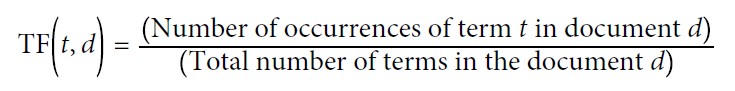

**IDF (inverse document frequency)** measures the importance of the term across a corpus. In computing TF, all terms are given equal importance (weightage). However, it’s a well-known fact that stop words like is, are, am, etc., are not important, even though they occur frequently. To account for such cases, IDF weighs down the terms that are very common across a corpus and weighs up the rare terms. IDF of a term t is calculated as follows:

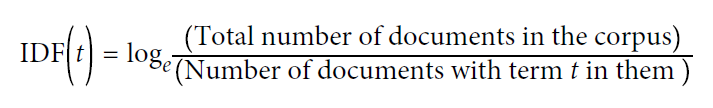

The TF-IDF score is a product of these two terms. Thus, TF-IDF score = TF * IDF. Let’s consider an example.

Sentence A = The Car is Driven on the Road <br>
Sentence B = The Truck is Driven on the highway <br>

Computation of TF-IDF scores are shown below

![](https://cdn-media-1.freecodecamp.org/images/1*q3qYevXqQOjJf6Pwdlx8Mw.png)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

sample_corpus = ["the cat sat", "the cat sat in the hat", "the cat with the hat"]
tfidf_rep = tfidf.fit_transform(sample_corpus)
print(f"IDF Values for sample corpus : {tfidf.idf_}")


print("TF-IDF Representation for sentence 'the cat sat in the hat' :") 
print(tfidf.transform(["the cat sat in the hat"]).toarray())

Similar to BoW, we can use the TF-IDF vectors to calculate the similarity between two texts using a similarity measure like Euclidean distance or cosine similarity. TF-IDF is a commonly used representation in application scenarios such as information
retrieval and text classification. However, even though TF-IDF is better than the vectorization methods we saw earlier in terms of capturing similarities between words, **it still suffers from the curse of high dimensionality.**

**Here are the main advantages and disadvantages of TF-IDF Representation:**

1. Its Implementation is not that easy as compared to techniques discussed above 
2. We have a fixed-length encoding for any sentence of arbitrary length.
3. The feature vectors are high-dimensional representations. The dimensionality increases with the size of the vocabulary.
4. It did capture a bit of the semantics of the sentence. 
5. They too cannot handle OOV words.

With this, we come to the end of basic vectorization approaches. Now, let’s start looking at distributed representations.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Word2vec Word Embeddings</h1><a id = "8" ></a>

**Word Embeddings** : They are a real-valued vector representation of words that allows words with the same meaning to have similar representation. Thus we can say word embeddings are the projection of meanings of words in a real-valued vector 

Word2vec is a Word Embedding Technique published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text.

It is the representation of words that allows words with the same meaning to have similar representation, Word2vec operationalizes this by projecting the meaning of the words in a vector space where words with similar meanings will tend to cluster together, and works with very different meanings are far from one another.

**Using Pre-trained word2vec word embeddings** <br>
Training your own word embeddings is a pretty expensive process (in terms of both time and computing). Thankfully, for many scenarios, it’s not necessary to train your own embeddings Someone has done the hard work of training word embeddings on a large corpus, such as Wikipedia, news articles, or even the entire web, and has put words and their corresponding vectors on the web. These embeddings
can be downloaded and used to get the vectors for the words you want.  

Some of the most popular pre-trained embeddings are Word2vec by Google, GloVe by Stanford, and fasttext embeddings by Facebook, to name a few.

Below code, cell demonstrates how to use pre-trained word2vec word embeddings.

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
pretrained_path = "../input/googles-trained-word2vec-model-in-python/GoogleNews-vectors-negative300.bin"

Word2VecModel = KeyedVectors.load_word2vec_format(pretrained_path, binary = True)

As we learned Word2vec do have a similar vector representation for words with the same meaning so let's check the similar words for the word "good"

In [ ]:
print(Word2VecModel.most_similar('good'))

In [ ]:
print(Word2VecModel['good'])

In the output of the above code cell, we can see a 300-dimensional real-valued vector for the word "good".

The above few cells were about using pre-trained word2vec representation now in upcoming cells we will focus on learning/Training our own word2vec representations.

**Training our own embeddings**

Now we’ll focus on training our own word embeddings. For this, we’ll look at two architectural variants that were proposed in the original Word2vec approach. The two variants are:

1. Continuous bag of words (CBOW)
2. SkipGram

Both of these have a lot of similarities in many respects. 

Throughout this section, we’ll use the sentence “The quick brown fox jumps over the lazy dog” as our example text.

**1. Continuous bag of words (CBOW)**

In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears. Consider our example sentence we take the word “jumps” as the center word, then its context is formed by words in its vicinity. If we take the context size of 2, then for our example, the context is given by brown, fox, over, the. CBOW uses the context words to predict the target word—jumps—as shown in the below figure 
<br><br>

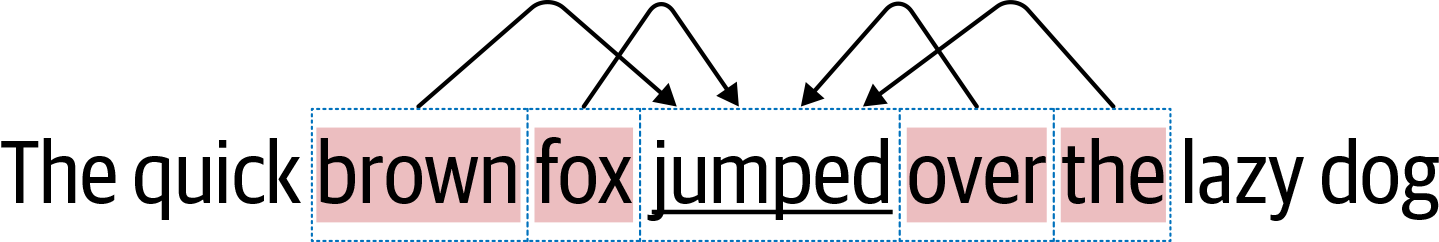

<br><br>
Now next task is to create a training sample of the form (X, Y) for this task where X will be context words and Y will be Center word. We define the value of context window = 2 in this case. 
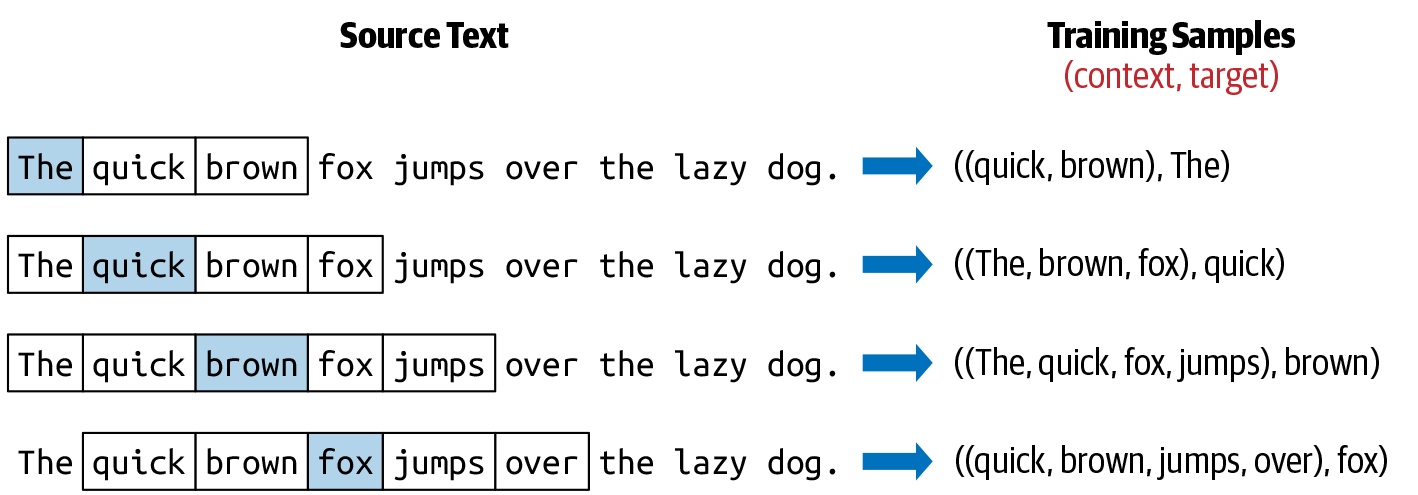

<br><br>
Now that we have the training data ready, let’s focus on the model. For this, we construct a shallow net (it’s shallow since it has a single hidden layer). We assume we want to learn D-dim word embeddings. Further, let V be the vocabulary of the text corpus

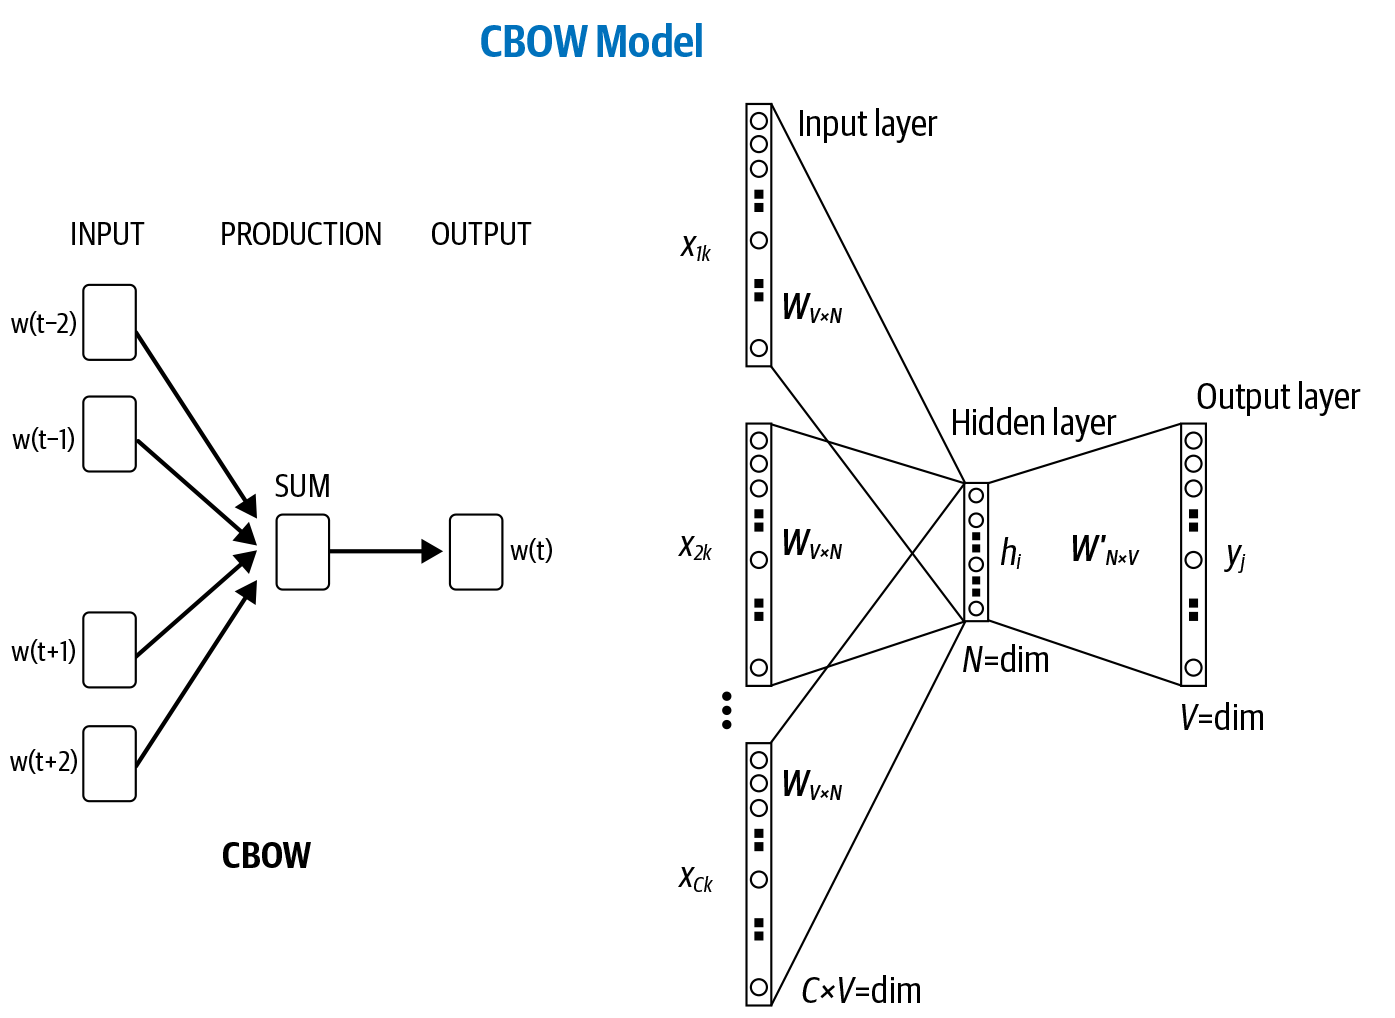


<br><br>
The objective is to learn an embedding matrix E|V| x d.To begin with, we initialize the matrix randomly. Here, |V| is the size of corpus vocabulary and d is the dimension of the embedding. Let’s break down the shallow net in Figure layer by layer. In the input layer, indices of the words in context are used to fetch the corresponding rows from the embedding matrix E|V| x d. The vectors fetched are then added to get a single D-dim vector, and this is passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|.. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.
<br><br>

**2. SkipGram** 

SkipGram is very similar to CBOW, with some minor changes. In Skip‐ Gram, the task is to predict the context words from the center word. For our toy corpus with context size 2, using the center word “jumps,” we try to predict every word in context—“brown,” “fox,” “over,” “the”—as shown in the Figure below 

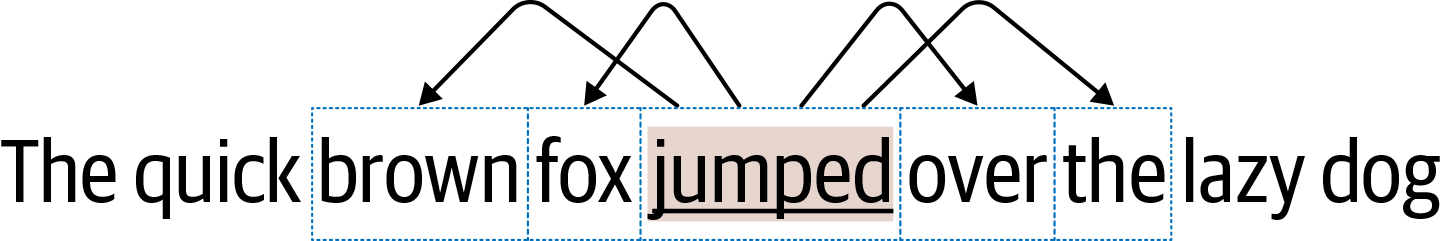

Now we will create a training sample of the form (X, Y) for this task where X will be the center word and Y will be Context words. 

<br>
<br>

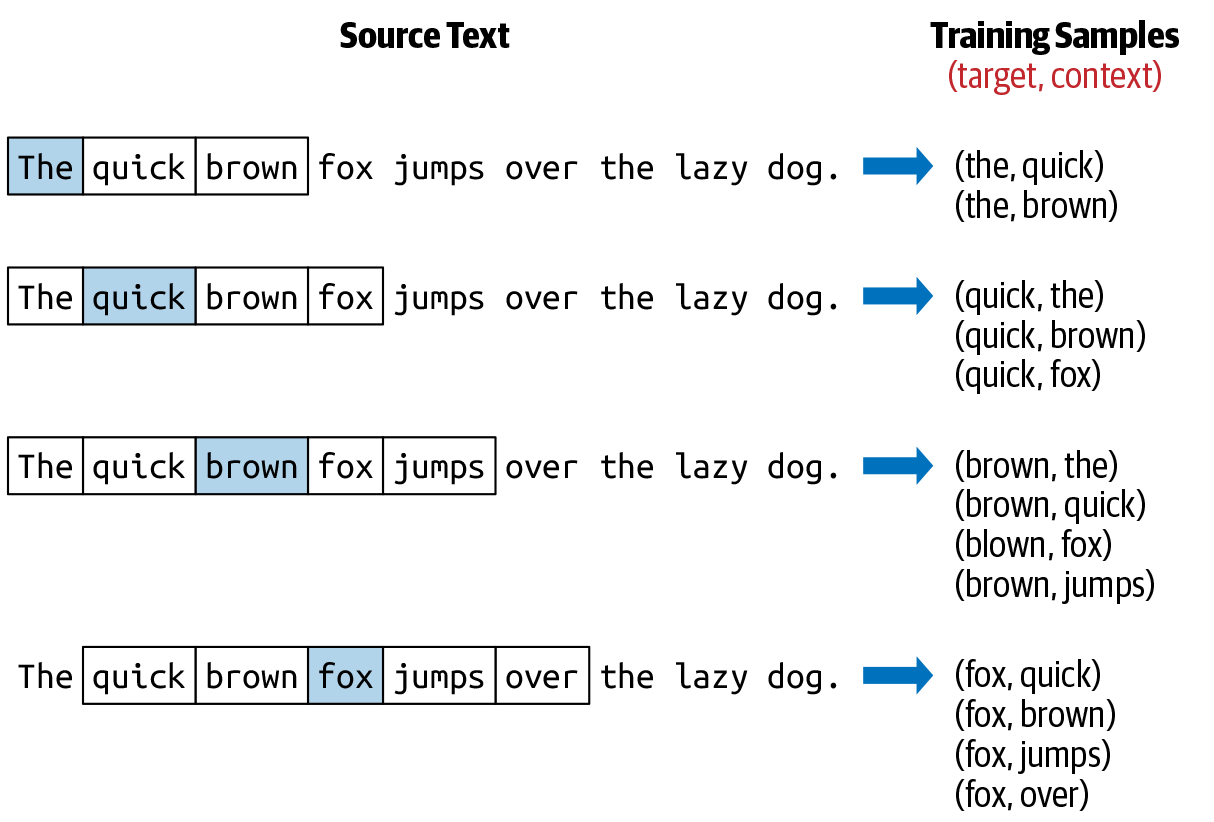

<br>
<br>

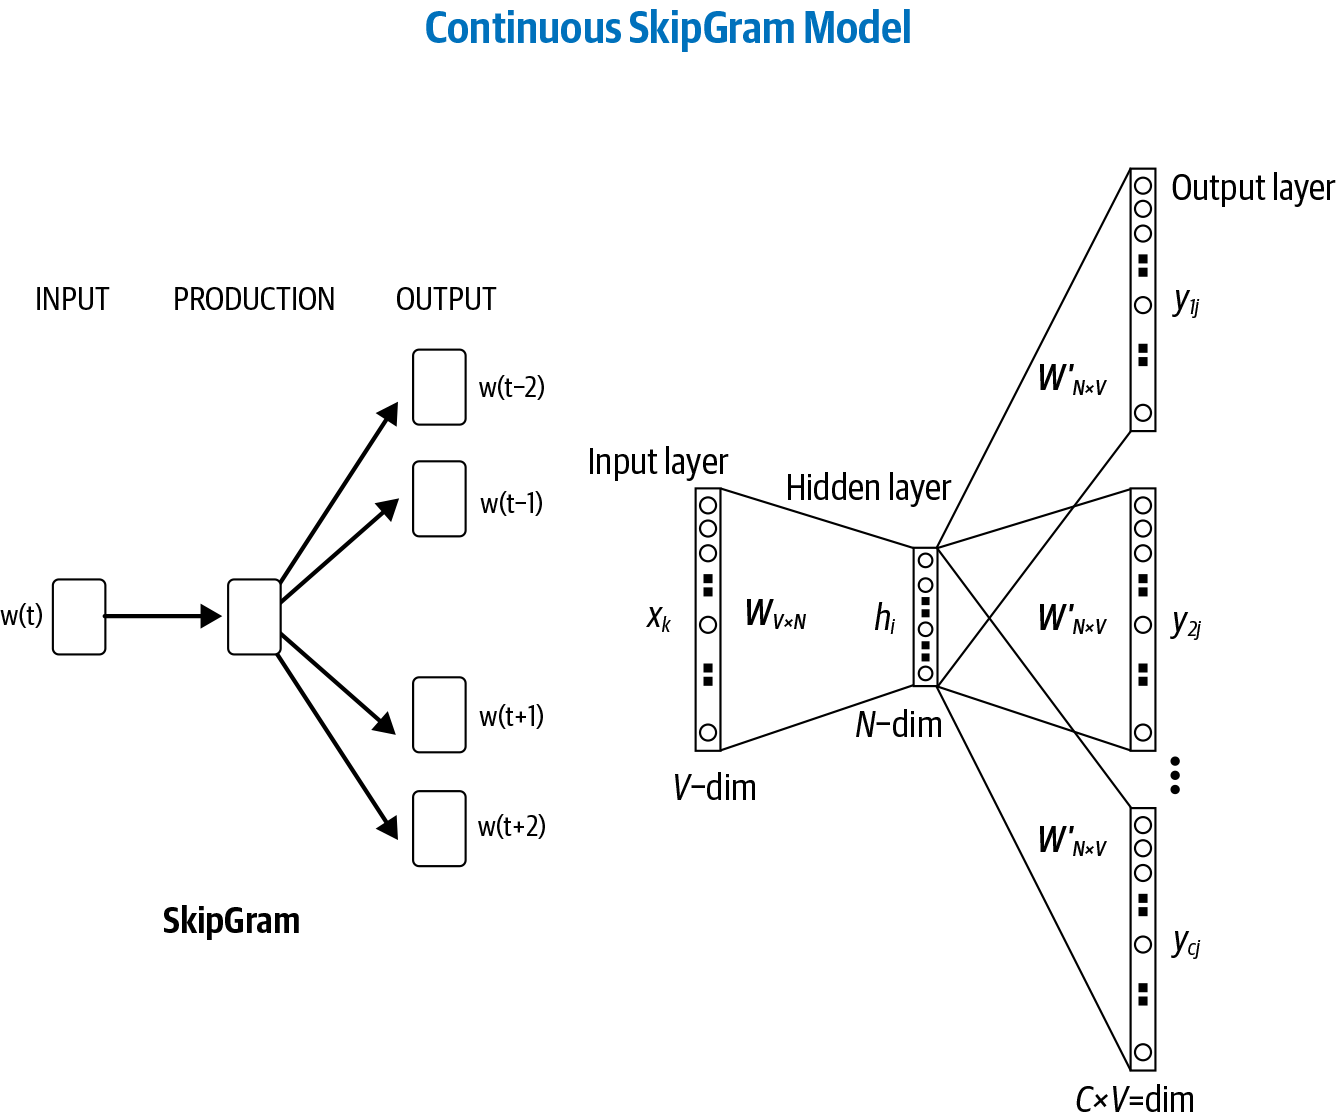

<br>
<br>

The shallow network used to train the SkipGram model, shown in the below Figure, is very similar to the network used for CBOW, with some minor changes. In the input layer, the index of the word in the target is used to fetch the corresponding row from the embedding matrix E|V| x d. The vectors fetched are then passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.

**Implementation** : 

One of the most commonly used implementations is with gensim. We have to choose several hyperparameters (i.e., the variables that need to be set before starting the training process). Let’s look at two examples.

Dimensionality of the word vectors

As the name indicates, this decides the space of the learned embeddings. While there is no ideal number, it’s common to construct word vectors with dimensions in the range of 50–500 and evaluate them on the task we’re using them for to choose the best option. In gensim we do this by setting the "vector_size" parameter to the size we want. 

Context window

How long or short the context we look for to learn the vector representation is. In gensim we do this by setting the "window" parameter to the size we want.

There are also other choices we make, such as whether to use CBOW or SkipGram to
learn the embeddings.

Next few code cells shows implementation of CBOW

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

print("Sentences on Which We are gonna train our CBOW Word2Vec Model:\n")
print(common_texts)

Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, vector_size = 10, window = 5, min_count = 1, workers = 8, sg = 0)
Our_CBOW_Word2Vec_Model.save("Our_CBOW_Word2Vec_Model.w2v")
print("Model Saved")

In [ ]:
Our_CBOW_Word2Vec_Model.wv.most_similar('human', topn = 5)

In [ ]:
Our_CBOW_Word2Vec_Model.wv['human']

The Above cells show code implementation of the CBOW model one can experiment with tunning hyperparameters. Interested one can experiment by setting sg hyperparameter to 1 then the model will become a skip-gram model.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Glove Word Embeddings</h1><a id = "9" ></a>

GloVe Stands for Global Vectors for word representation is another word embedding technique that was developed as an open-source project at Stanford and was launched in 2014. Just to refresh, word vectors put words to a nice vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But keep in mind that there’s quite a bit of synergy between the GloVe and Word2vec. The gloVe can be used to find relations between words like synonyms, company-product relations, zip codes, and cities, etc.

The question may arise Why do we need Glove if we have word2vec as a good word embedding technique Because Word2vec relies only on local information of language. That is, the semantics learned for a given word, are only affected by the surrounding words.

For example, take the sentence,

The cat sat on the mat

If you use Word2vec, it wouldn’t capture information like,

is “the” a special context of the words “cat” and “mat” ?

or

is “the” just a stopword?

This can be suboptimal, especially in the eye of theoreticians.

GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.

![](https://miro.medium.com/max/434/1*QWcK8CIDs8kMkOwsOxvywA.png)

The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.

For detailed knowledge about Glove word embedding, you can refer [This article](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)

In [ ]:
Glove_path = "../input/glove6b/glove.6B.100d.txt"
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(Glove_path, word2vec_output_file)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = './glove.6B.100d.txt.word2vec'
Glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
print("Most similar words to word 'human' : ")
Glove_model.most_similar('human')

In [ ]:
print("Glove Word Embeddings of word 'human' ")
Glove_model['human']

**Advantages of Word2Vec:**

1. The idea is very intuitive, which transforms the unlabeled raw corpus into labeled data (by mapping the target word to its context word), and learns the representation of words in a classification task.
2. The data can be fed into the model in an online way and needs little preprocessing, thus requiring little memory.
3. the mapping between the target word to its context word implicitly embeds the sub-linear relationship into the vector space of words, so that relationships like “king:man as queen: woman” can be inferred by word vectors.
3. It is simple for a freshman to understand the principle and do the implementation.

**Disadvantages of Word2Vec:**

1. The sub-linear relationships are not explicitly defined. There is little theoretical support behind such characteristics.
2. The model could be very difficult to train if use the softmax function, since the number of categories is too large (the size of vocabulary). Though approximation algorithms like negative sampling (NEG) and hierarchical softmax (HS) are proposed to address the issue, other problems happen. For example, the word vectors by NEG are not distributed uniformly, they are located within a cone in the vector space hence the vector space is not sufficiently utilized.
3. It still provides no way to address the **out of vocabulary(OOV)** problem.

**Advantages of Glove:**

1. The goal of Glove is very straightforward, i.e., to enforce the word vectors to capture sub-linear relationships in the vector space. Thus, it proves to perform better than Word2vec in the word analogy tasks.
2. Glove adds some more practical meaning to word vectors by considering the relationships between word pair and word pair rather than word and word.
3. Glove gives lower weight for highly frequent word pairs to prevent the meaningless stop words like “the”, “an” will not dominating the training progress.

**Disadvantages of Glove:**

1. The model is trained on the co-occurrence matrix of words, which takes a lot of memory for storage. Especially, if you change the hyper-parameters related to the co-occurrence matrix, you have to reconstruct the matrix again, which is very time-consuming.

**Both Word2vec and Glove do not solve the problems like:**

1. How to learn the representation for out-of-vocabulary words.
2. How to separate some opposite word pairs. For example, “good” and “bad” are usually located very close to each other in the vector space, which may limit the performance of word vectors in NLP tasks like sentiment analysis.

Content of this cell is taken from [Quora](https://www.quora.com/What-are-the-advantages-and-disadvantages-of-Word2vec-and-GloVe)


Despite the ease of using Powerfull Word Embeddings like Word2vec or any such word embedding to do feature extraction from texts, **we don’t have a good way of handling OOV words yet**.

What We can do to solve this Problem?

1. A simple approach that often works is to exclude those words from the feature extraction process so we don’t have to worry about how to get their representations.

2. Another way to deal with the OOV problem for word embeddings is to create vectors that are initialized randomly.

3. There are also other approaches that handle the OOV problem by modifying the training process by bringing in characters and other subword-level linguistic components. Let’s look at one such approach now. The key idea is that one can potentially handle the OOV problem by using subword information, such as morphological properties (e.g., prefixes, suffixes, word endings, etc.), **or by using character representations. fastText, from Facebook AI research**, is one of the popular algorithms that follows this approach.



<h1  style="text-align: center" class="list-group-item list-group-item-action active">FastText Word Embeddings</h1><a id = "10" ></a>

A word can be represented by its constituent character ngrams. Following a similar architecture to Word2vec, fastText learns embeddings for words and character n-grams together and views a word’s embedding vector as an aggregation of its constituent character n-grams. This makes it possible to generate embeddings even for words that are not present in the vocabulary. Say there’s a word, “gregarious,” that’s not found in the embedding’s word vocabulary. We break it into character n-grams—gre, reg, ega, ….ous—and combine these embeddings of the ngrams to arrive at the embedding of “gregarious.”

How FastText Works?

FastText is a modified version of word2vec (i.e.. Skip-Gram and CBOW). The only difference between fastText vs word2vec is its pooling strategies (what are the input, output, and dictionary of the model). In word2vec each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram.

**character n-grams** the contiguous sequence of n items from a given sample of a character or word. It may be bigram, trigram, etc.
For example character trigram (n = 3) of the word “where” will be:

<wh, whe, her, ere, re>

In FastText architecture, they have also included the word itself with the character n-gram. That means input data to the model for the word “eating” will be:

![](https://amitness.com/images/fasttext-center-word-embedding.png)

Now the model I am referring same is word2vec which is a shallow neural network with one hidden layer as discussed above.


Now to prepare training data for the (Skip-Gram-based) FastText model, we define “context word” as the word which follows a given word in the text (which will be our “target word”). That means we will be predicting the surrounding word for a given word.

Note: FastText word embeddings support both Continuous Bag of Words (CBOW) and Skip-Gram models. I will explain and implement the skip-gram model in the below cell to learn vector representation (FastText word embeddings). Now let’s construct our training examples (like Skip-Gram), scanning through the text with a window will prepare a context word and a target word.

Consider the sentence : 

<div style = "text-align:center"><b> i like natural language processing</b></div>

![](https://secureservercdn.net/45.40.148.234/um0.ec8.myftpupload.com/wp-content/uploads/2020/10/Picture2.png)

For the above example, for context words “i” and “natural” the target word will be “like”. Full training data for FastText word embedding will look like below. By observing the below training data, your confusion of fastText vs word2vec should be clear.


Now you know in word2vec (skip-gram) each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram. This training data preparation is the only difference between FastText word embeddings and skip-gram (or CBOW) word embeddings.

After training data preparation of FastText, training the word embedding, finding word similarity, etc. are the same as the word2vec model (for our example similar to the skip-gram model).

Now let’s see how to implement FastText word embeddings in python using Gensim library.


In [ ]:
from gensim.models.fasttext import load_facebook_model
from gensim.models import FastText, KeyedVectors

fasttext_model = KeyedVectors.load_word2vec_format('../input/fasttext-wikinews/wiki-news-300d-1M.vec')

# fasttext_model = FastText.load_fasttext_format('../input/fasttext-crawl-300d-2m/crawl-300d-2M.vec')
print("Most similar words to word 'human' : ")
fasttext_model.most_similar('human')

In [ ]:
print("Glove Word Embeddings of word 'human' ")
fasttext_model['human']

Training our own fasttext model using python's gensim library by settings up below listed hyperparameters:


- size: Dimensionality of the word vectors. window=window_size,
- min_count: The model ignores all words with total frequency lower than this.
- sample: The threshold for configuring which higher-frequency words are randomly down sampled, useful range is (0, 1e-5).
- workers: Use these many worker threads to train the model (=faster training with multicore machines).
- sg: Training algorithm: skip-gram if sg=1, otherwise CBOW.
- iter: Number of iterations (epochs) over the corpus.

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

our_fasttext_model = FastText(common_texts, vector_size = 100, min_count = 1, window = 5, sg = 1)

In [ ]:
print("Most Similar words of word 'computer' : ")
our_fasttext_model.wv.most_similar('computer')

In [ ]:
#Word Embedding for Word "Computer"

our_fasttext_model.wv['computer']

We can observe results obtained are not very good because I didn't tune the hyperparameters nicely, you can do this task and if you got good results then let me know as well.

A potential problem with both approaches is that they do not take the context of words into account. Take, for example, the sentences “cat sat on mat” and “mat sat on cat.” Both receive the same representation in these approaches, but they obviously have very different meanings. Let’s look at another approach, **Doc2vec**, which allows us to directly learn the representations for texts of arbitrary lengths (phrases, sentences, paragraphs, and documents) by taking the context of words in the text into account.

You can Explore Doc2Vec in great detail and I will also try to bring its details in future versions

**Important Points Regarding Word Embeddings**

1. All text representations are **inherently biased** based on what they saw in training data. For example, an embedding model trained heavily on technology news or articles is likely to identify Apple as being closer to, say, Microsoft or Facebook than to an orange or pear.

2. Unlike the basic vectorization approaches, pre-trained embeddings are generally **large-sized files (several gigabytes)**, which may pose problems in certain deployment scenarios. This is something we need to address while using them, otherwise, it can become an engineering bottleneck in performance. The Word2vec model takes ~4.5 GB RAM.

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Visualizing Embeddings</h1><a id = "11" ></a>


So far, we’ve seen various vectorization techniques for representing text. The vectors obtained are used as features for the NLP task at hand. An important aspect of any ML project is feature exploration. Visual exploration is a very important aspect of any data-related problem. Even though embeddings are low-dimensional vectors, even
100 or 300 dimensions are too high to visualize.

t-SNE, or t-distributed Stochastic Neighboring Embedding help us solve this problem. It’s a technique used for visualizing high-dimensional data like embeddings by reducing them to two or three-dimensional data. The technique takes in the embeddings (or any data) and looks at how to best represent the input data using lesser dimensions, all while maintaining the same data distributions in original high-dimensional input space and low-dimensional output space. This, therefore, enables us to plot and visualize the input data. It helps to get a feel for the space of word embedding.

Now lets plot scatter plots of most-similar words in the vocabulary of different embedding schemes. 

In [ ]:
# Visualizing Word2vec Word Embedding 

keys = ['India', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war']

words_clusters = []
embeddings_clusters = []

for word in keys:
    
    words = []
    embeddings = []
    
    for similar_word, _ in Word2VecModel.most_similar(word, topn = 30):
        words.append(similar_word)
        embeddings.append(Word2VecModel[word])
    words_clusters.append(words)
    embeddings_clusters.append(embeddings)


In [ ]:
    
from sklearn.manifold import TSNE

embedding_array = np.array(embeddings_clusters)
n, m, k = embedding_array.shape

tsne_2d_model = TSNE(perplexity = 15, n_components = 2, n_iter = 4000, random_state = 11, init = 'pca')
tsne_embeddings = np.array(tsne_2d_model.fit_transform(embedding_array.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
    
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

def plot_most_similar_words(labels, embedding_cluster, word_cluster, title):
    
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.figure(figsize = (16,9))
    for label, embeddings, words, color in zip(labels, embedding_cluster, word_cluster, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=0.7, label=label)
    plt.legend(loc = 4)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
plot_most_similar_words(keys, tsne_embeddings, words_clusters, "Visualizing Word2vec Word Embedding")

You can visualize and analyze every embedding discussed in this notebook and can also suggest to me some new visualization techniques for Word Embeddings.